## Predicting Sales Price of Old car using Regression

## Business Problem: As per the reports from Auto Car India, in FY2021, the pre-owned sector in India stood at 3.8 million units, making it 1.5 times bigger than the 2.6 million unit new car market. While sales in both segments are set to rise in the next few years, the gap is expected to widen, with the research report projecting 8.2 million used car sales in FY2025, compared to 3.9 million new vehicle purchases in the same year. 

# Importing required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
car = pd.read_csv('Car_details_v3.csv', index_col=[0])

In [3]:
car

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0


In [4]:
car.shape

(8128, 12)

# Checking informations

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8128 entries, Maruti Swift Dzire VDI to Tata Indigo CR4
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  torque         7906 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 825.5+ KB


## There are null values in the attribute 'mileage', 'engine', 'max power', 'torque' , 'seats'

In [6]:
car.isnull().any()

year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [7]:
car.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

## percentage of missing values w.r.t the dataframe car_details

In [8]:
car.isnull().sum()/len(car) *100

year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

### Insight from the missing values of the attributes:
#### 1) The percentage of missing values of the attributes is maximum 2-3%(approx) of the whole dataframe. So we can drop those instances for handling these missing values
#### 2) We can also apply other null imputation methods to fill up the null spaces of the respective attributes. 
#### For this dataframe we are choosing the first method i.e. dropping the instances.

# Making a copy of the main dataset for processing and other analysis

In [9]:
car_details = car.copy()

In [10]:
car_details.head(15)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0


## Checking the correlation before cleaning the data

In [11]:
car_details.corr()

,year,selling_price,km_driven,seats
year,1.000000,0.414092,-0.418006,-0.009144
selling_price,0.414092,1.000000,-0.225534,0.041358
km_driven,-0.418006,-0.225534,1.000000,0.227336
seats,-0.009144,0.041358,0.227336,1.000000


## Here we are getting highest correlation coefficient between 'year' and 'seling_price' which is 0.414092 . But the other attributes like: 'mileage', 'engine', 'max_power' and 'torque' seem to be numeric and may have some correlation with the selling price.

## we have to convert 'mileage', 'engine', 'max_power', 'torque' to numerical attributes. We need to treat with the 'torque' attribute separately

In [12]:
attr = ['mileage', 'engine', 'max_power']
for i in attr:
    car_details[i] = car_details[i].apply(lambda x : (str(x).split(" ")[0]))

In [13]:
#car_details['mileage'] = car_details['mileage'].apply(lambda x : str(x).split(" ")[0])

In [14]:
car_details[['mileage','engine','max_power']]

,mileage,engine,max_power
name,,,
Maruti Swift Dzire VDI,23.4,1248,74
Skoda Rapid 1.5 TDI Ambition,21.14,1498,103.52
Honda City 2017-2020 EXi,17.7,1497,78
Hyundai i20 Sportz Diesel,23.0,1396,90
Maruti Swift VXI BSIII,16.1,1298,88.2
...,...,...,...
Hyundai i20 Magna,18.5,1197,82.85
Hyundai Verna CRDi SX,16.8,1493,110
Maruti Swift Dzire ZDi,19.3,1248,73.9


In [15]:
car_details.head(15)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5.0
Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3,1061,57.5,"7.8@ 4,500(kgm@ rpm)",5.0
Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1,796,37,59Nm@ 2500rpm,4.0
Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364,67.1,170Nm@ 1800-2400rpm,5.0


## Converting the 'mileage', 'engine', 'max_power' to numeric from text or object type

In [16]:
attr = ['mileage', 'engine', 'max_power']
for i in attr:
    car_details[i] = pd.to_numeric(car_details[i],errors = 'coerce')

In [17]:
car_details.head(15)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0
Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,"7.8@ 4,500(kgm@ rpm)",5.0
Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,59Nm@ 2500rpm,4.0
Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,170Nm@ 1800-2400rpm,5.0


In [18]:
car_details[['mileage','engine','max_power']]

,mileage,engine,max_power
name,,,
Maruti Swift Dzire VDI,23.40,1248.0,74.00
Skoda Rapid 1.5 TDI Ambition,21.14,1498.0,103.52
Honda City 2017-2020 EXi,17.70,1497.0,78.00
Hyundai i20 Sportz Diesel,23.00,1396.0,90.00
Maruti Swift VXI BSIII,16.10,1298.0,88.20
...,...,...,...
Hyundai i20 Magna,18.50,1197.0,82.85
Hyundai Verna CRDi SX,16.80,1493.0,110.00
Maruti Swift Dzire ZDi,19.30,1248.0,73.90


In [19]:
car_details.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

## As we can see that 'Mileage', 'Engine', 'Max_Power' these attributes have been converted to Float Type

In [20]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8128 entries, Maruti Swift Dzire VDI to Tata Indigo CR4
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7912 non-null   float64
 10  torque         7906 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 825.5+ KB


In [21]:
corr = car_details.corr()

In [22]:
corr

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.414092,-0.418006,0.329145,0.018848,0.226320,-0.009144
selling_price,0.414092,1.000000,-0.225534,-0.126054,0.455734,0.748489,0.041358
km_driven,-0.418006,-0.225534,1.000000,-0.173073,0.205914,-0.038075,0.227336
mileage,0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.374621,-0.452085
engine,0.018848,0.455734,0.205914,-0.575831,1.000000,0.703975,0.610309
max_power,0.226320,0.748489,-0.038075,-0.374621,0.703975,1.000000,0.191999
seats,-0.009144,0.041358,0.227336,-0.452085,0.610309,0.191999,1.000000


In [23]:
corr.selling_price.sort_values(ascending=False)

selling_price    1.000000
max_power        0.748489
engine           0.455734
year             0.414092
seats            0.041358
mileage         -0.126054
km_driven       -0.225534
Name: selling_price, dtype: float64

## 'selling_prie' has the highest correlation with 'max_power' having approx value 0.75

<AxesSubplot:>

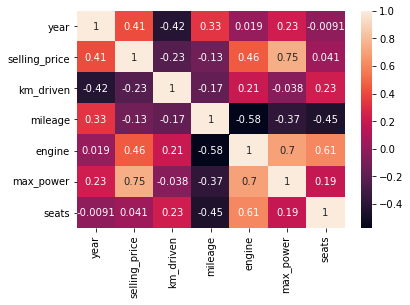

In [24]:
sns.heatmap(car_details.corr(),annot=True)

In [25]:
car_details['torque']

name
Maruti Swift Dzire VDI                     190Nm@ 2000rpm
Skoda Rapid 1.5 TDI Ambition          250Nm@ 1500-2500rpm
Honda City 2017-2020 EXi            12.7@ 2,700(kgm@ rpm)
Hyundai i20 Sportz Diesel        22.4 kgm at 1750-2750rpm
Maruti Swift VXI BSIII              11.5@ 4,500(kgm@ rpm)
                                          ...            
Hyundai i20 Magna                        113.7Nm@ 4000rpm
Hyundai Verna CRDi SX           24@ 1,900-2,750(kgm@ rpm)
Maruti Swift Dzire ZDi                     190Nm@ 2000rpm
Tata Indigo CR4                       140Nm@ 1800-3000rpm
Tata Indigo CR4                       140Nm@ 1800-3000rpm
Name: torque, Length: 8128, dtype: object

In [26]:
car['torque'].value_counts()

190Nm@ 2000rpm         530
200Nm@ 1750rpm         445
90Nm@ 3500rpm          405
113Nm@ 4200rpm         223
114Nm@ 4000rpm         171
                      ... 
96Nm@ 3000rpm            1
121Nm@ 2800rpm           1
640Nm@ 1740rpm           1
250Nm@ 1500-4500rpm      1
490Nm@ 1600rpm           1
Name: torque, Length: 441, dtype: int64

### From this torque attribute we can say that it's extremely unorganized and the first few values have higher counts of vehicles and this count goes on gradually decreasing

## Seeing the name of all the columns of the dataframe

In [27]:
car_details.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## Finding the number of unique values of all the attributes of the 'car_details' dataframe:

In [28]:
for i in car_details.columns:
    print(f'The number of unique values in {i} is : ',car_details[i].nunique())
#    print("The number of unique values in "+ i +" is :", len(car_details[i].value_counts()) )

The number of unique values in year is :  29
The number of unique values in selling_price is :  677
The number of unique values in km_driven is :  921
The number of unique values in fuel is :  4
The number of unique values in seller_type is :  3
The number of unique values in transmission is :  2
The number of unique values in owner is :  5
The number of unique values in mileage is :  381
The number of unique values in engine is :  121
The number of unique values in max_power is :  319
The number of unique values in torque is :  441
The number of unique values in seats is :  9


In [29]:
type(pd.to_datetime('today').year)

int

## showing the unique values of the attributes

In [30]:
car_details['year'].unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2003, 2019, 2008, 2020, 1999, 2000, 1983,
       2004, 1996, 1994, 1995, 1998, 1997, 1991], dtype=int64)

In [31]:
car_details['year'].min()

1983

In [32]:
car_details['year'].max()

2020

In [33]:
car_details['km_driven'].unique()[:10]            # showing first 10 values

array([145500, 120000, 140000, 127000,  45000, 175000,   5000,  90000,
       169000,  68000], dtype=int64)

In [34]:
car_details['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [35]:
car_details['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [36]:
car_details['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [37]:
car_details['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [38]:
car_details['mileage'].unique()[:10]                # showing first 10 values 

array([23.4 , 21.14, 17.7 , 23.  , 16.1 , 20.14, 17.3 , 23.59, 20.  ,
       19.01])

In [39]:
car_details['engine'].unique()

array([1248., 1498., 1497., 1396., 1298., 1197., 1061.,  796., 1364.,
       1399., 1461.,  993.,   nan, 1198., 1199.,  998., 1591., 2179.,
       1368., 2982., 2494., 2143., 2477., 1462., 2755., 1968., 1798.,
       1196., 1373., 1598., 1998., 1086., 1194., 1172., 1405., 1582.,
        999., 2487., 1999., 3604., 2987., 1995., 1451., 1969., 2967.,
       2497., 1797., 1991., 2362., 1493., 1599., 1341., 1794.,  799.,
       1193., 2696., 1495., 1186., 1047., 2498., 2956., 2523., 1120.,
        624., 1496., 1984., 2354.,  814.,  793., 1799.,  936., 1956.,
       1997., 1499., 1948., 2997., 2489., 2499., 2609., 2953., 1150.,
       1994., 1388., 1527., 2199.,  995., 2993., 1586., 1390.,  909.,
       2393., 3198., 1339., 2835., 2092., 1595., 2496., 1596., 1597.,
       2596., 2148., 1299., 1590., 2231., 2694., 2200., 1795., 1896.,
       1796., 1422., 1489., 2359., 2197., 2999., 1781., 2650., 1343.,
       2446., 3498., 2198., 2776., 1950.])

In [40]:
car_details['max_power'].unique()[:30]         # showing first 30 values

array([ 74.  , 103.52,  78.  ,  90.  ,  88.2 ,  81.86,  57.5 ,  37.  ,
        67.1 ,  68.1 , 108.45,  60.  ,  73.9 ,    nan,  67.  ,  82.  ,
        88.5 ,  46.3 ,  88.73,  64.1 ,  98.6 ,  88.8 ,  83.81,  83.1 ,
        47.3 ,  73.8 ,  34.2 ,  35.  ,  81.83,  40.3 ])

In [41]:
car_details['torque'].unique()[:40]            # showing first 40 values

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm'], dtype=object)

## The insight from 'torque' column is not much clear as the values for each instance are not in proper orientation. So we are dropping that attribute from this dataframe.

In [42]:
car_details = car_details.drop('torque', axis=1)

In [43]:
car_details.columns    # After dropping the 'torque' attribute 

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [44]:
car_details['seats'].unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [45]:
pd.to_datetime('today')

Timestamp('2022-03-23 10:08:00.698998')

In [46]:
pd.to_datetime('today').year

2022

## Adding a new column for the purpose of EDA to check the selling price variation with respect to 'year of service'

In [47]:
car_details['Year_of_service'] = car_details['year'].apply(lambda x : pd.to_datetime('today').year - x)

In [48]:
car_details[['year','Year_of_service']].head()

,year,Year_of_service
name,,
Maruti Swift Dzire VDI,2014,8
Skoda Rapid 1.5 TDI Ambition,2014,8
Honda City 2017-2020 EXi,2006,16
Hyundai i20 Sportz Diesel,2010,12
Maruti Swift VXI BSIII,2007,15


In [49]:
corr1 = car_details.corr()

In [50]:
corr1

,year,selling_price,km_driven,mileage,engine,max_power,seats,Year_of_service
year,1.000000,0.414092,-0.418006,0.329145,0.018848,0.226320,-0.009144,-1.000000
selling_price,0.414092,1.000000,-0.225534,-0.126054,0.455734,0.748489,0.041358,-0.414092
km_driven,-0.418006,-0.225534,1.000000,-0.173073,0.205914,-0.038075,0.227336,0.418006
mileage,0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.374621,-0.452085,-0.329145
engine,0.018848,0.455734,0.205914,-0.575831,1.000000,0.703975,0.610309,-0.018848
max_power,0.226320,0.748489,-0.038075,-0.374621,0.703975,1.000000,0.191999,-0.226320
seats,-0.009144,0.041358,0.227336,-0.452085,0.610309,0.191999,1.000000,0.009144
Year_of_service,-1.000000,-0.414092,0.418006,-0.329145,-0.018848,-0.226320,0.009144,1.000000


## Making Box Plot of the numeric attributes to check if there is any outliers

## Box plot of 'max_power' attribute:

<AxesSubplot:ylabel='max_power'>

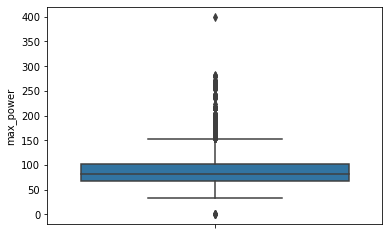

In [51]:
sns.boxplot(y='max_power', data=car_details)

<AxesSubplot:xlabel='year', ylabel='max_power'>

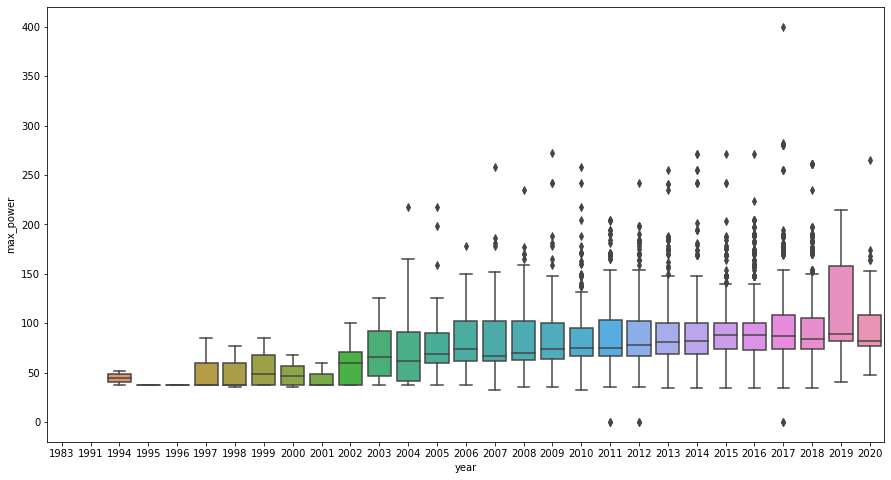

In [52]:
plt.figure(figsize=(15,8))
sns.boxplot(x='year', y='max_power',data=car_details)

## Box plot of 'engine' attribute:

<AxesSubplot:ylabel='engine'>

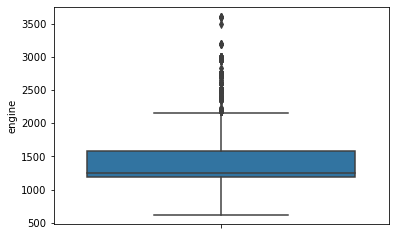

In [53]:
sns.boxplot(y='engine', data=car_details)

## Box plot of 'seats' attribute:

<AxesSubplot:ylabel='seats'>

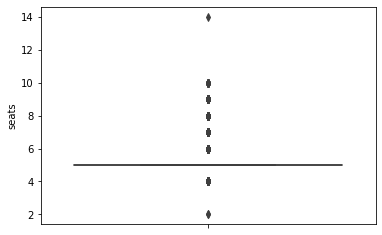

In [54]:
sns.boxplot(y='seats', data=car_details)

## Box plot of 'mileage' attribute:

<AxesSubplot:ylabel='mileage'>

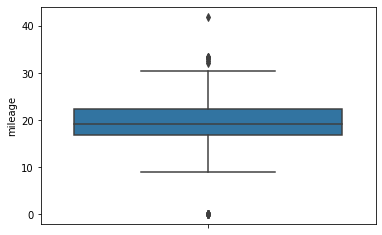

In [55]:
sns.boxplot(y='mileage', data=car_details)

<AxesSubplot:ylabel='km_driven'>

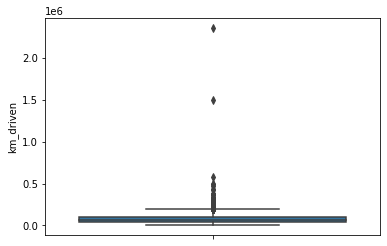

In [56]:
sns.boxplot(y='km_driven', data=car_details)

## Statistical summary for the object type attributes

In [57]:
car_details.describe(include=object)

,fuel,seller_type,transmission,owner
count,8128,8128,8128,8128
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,4402,6766,7078,5289


In [58]:
car_details['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

## Fuel

<AxesSubplot:xlabel='fuel', ylabel='count'>

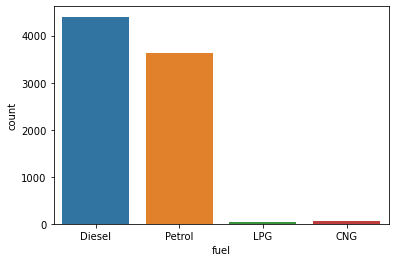

In [59]:
sns.countplot(x='fuel',data=car_details)

<AxesSubplot:xlabel='fuel'>

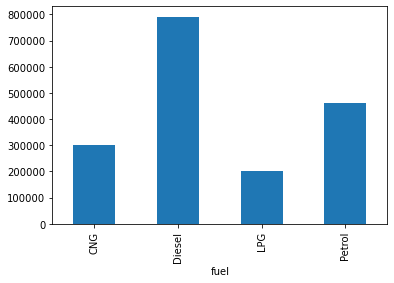

In [60]:
plt.figure()
car_details.groupby('fuel')['selling_price'].mean().plot(kind='bar')


#### As for each Fuel the mean selling price of car is varying huge so we can assume that fuel can be a good predictor or it may have a high influence on the selling price

In [61]:
#car_details['selling_price'].groupby(car_details['fuel']).std()

## Owner

<AxesSubplot:xlabel='owner', ylabel='count'>

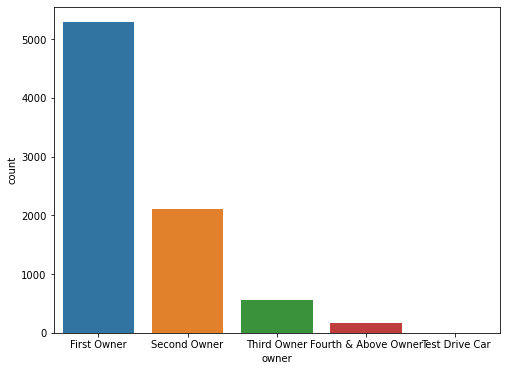

In [62]:
plt.figure(figsize=(8,6))
sns.countplot(x='owner', data=car_details)

## Checking Mean Selling price for individual group of different attributes

<AxesSubplot:xlabel='owner'>

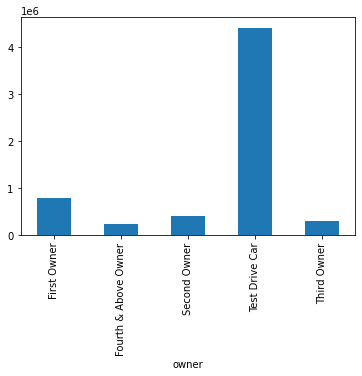

In [63]:
plt.figure()
car_details.groupby('owner')['selling_price'].mean().plot(kind='bar')

<AxesSubplot:xlabel='seller_type'>

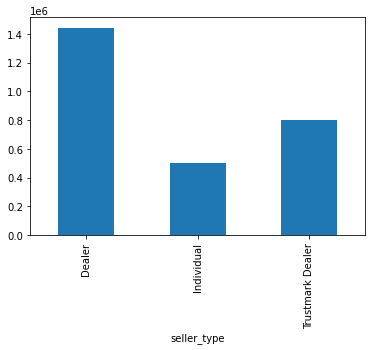

In [64]:
plt.figure()
car_details.groupby('seller_type')['selling_price'].mean().plot(kind='bar')

#### For Test Drive Car the the mean price is higher tha others

## Transmission

<AxesSubplot:xlabel='transmission', ylabel='count'>

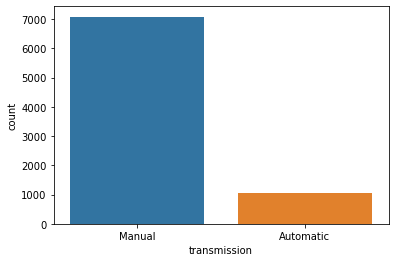

In [65]:
sns.countplot(x='transmission',data=car_details)

<AxesSubplot:xlabel='transmission'>

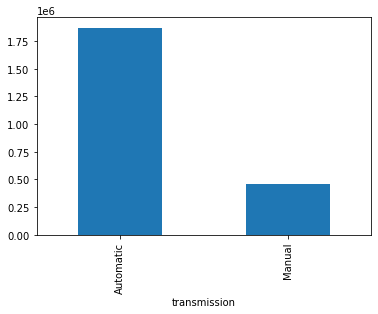

In [66]:
plt.figure()
car_details.groupby('transmission')['selling_price'].mean().plot(kind='bar')

## Seller_type

<AxesSubplot:xlabel='seller_type', ylabel='count'>

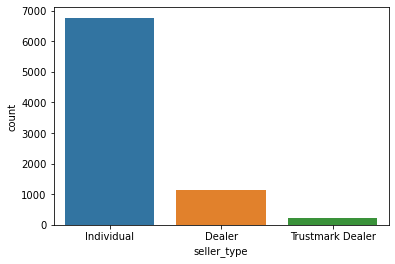

In [67]:
sns.countplot(x='seller_type',data=car_details)

In [68]:
car_details.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Year_of_service
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,8
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,8
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,16
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,12
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,15


In [69]:
car_details.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,Year_of_service
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7912.000000,7907.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719,8.195989
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,35.822499,0.959588,4.044249
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,7.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000,11.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,39.000000


## Histogram and KDE 

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

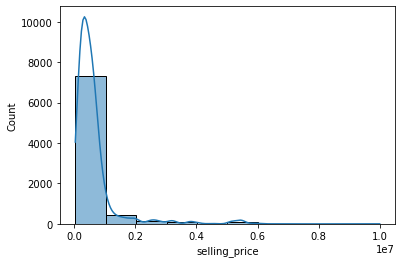

In [70]:
sns.histplot(x='selling_price',data=car_details,bins=10,kde=True)

<AxesSubplot:xlabel='mileage', ylabel='Count'>

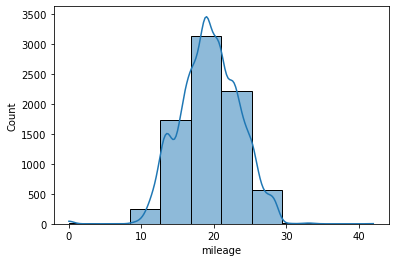

In [71]:
sns.histplot(x='mileage',data=car_details,bins=10,kde=True)

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

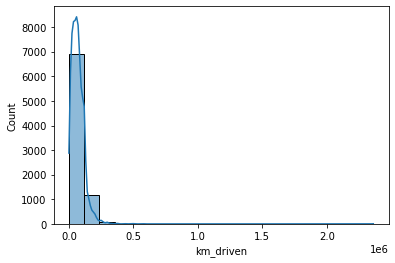

In [72]:
sns.histplot(x='km_driven',data=car_details,bins=20,kde=True)

<AxesSubplot:xlabel='engine', ylabel='Count'>

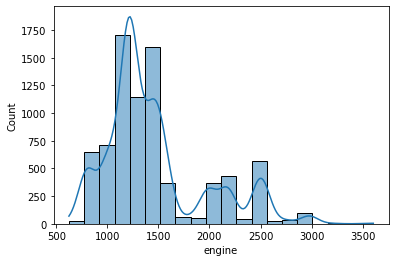

In [73]:
sns.histplot(x='engine',data=car_details,bins=20,kde=True)

<AxesSubplot:xlabel='max_power', ylabel='Count'>

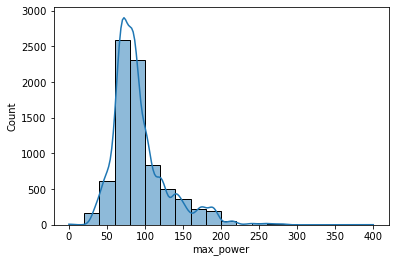

In [74]:
sns.histplot(x='max_power',data=car_details,bins=20,kde=True)

<AxesSubplot:xlabel='seats', ylabel='Count'>

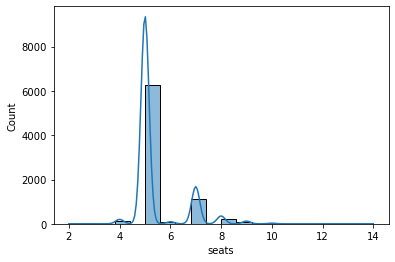

In [75]:
sns.histplot(x='seats',data=car_details,bins=20,kde=True)

<AxesSubplot:xlabel='mileage', ylabel='selling_price'>

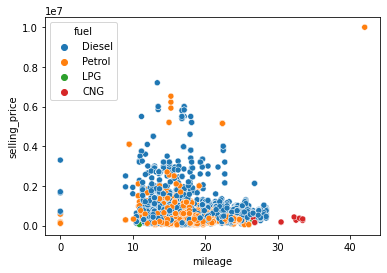

In [76]:
sns.scatterplot(x='mileage',y='selling_price',data=car_details, hue='fuel')

### Inference: Between 'mileage' and 'selling_price' the relation doesn't seem to be linear that much

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

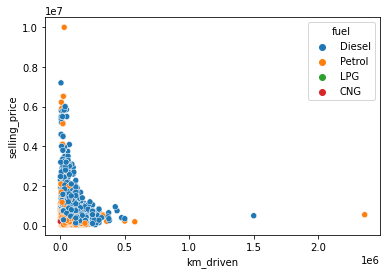

In [77]:
sns.scatterplot(x='km_driven',y='selling_price',data=car_details, hue='fuel')

### Inference: Between 'km_driven' and 'selling_price' the relation doesn't seem to be that much linear

<AxesSubplot:xlabel='engine', ylabel='selling_price'>

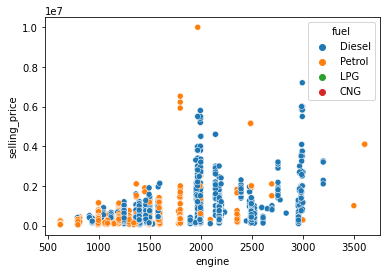

In [78]:
sns.scatterplot(x='engine',y='selling_price',data=car_details, hue='fuel')

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

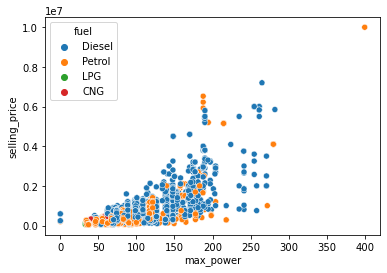

In [79]:
sns.scatterplot(x='max_power',y='selling_price',data=car_details, hue='fuel')

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

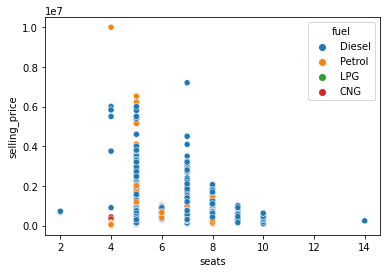

In [80]:
sns.scatterplot(x='seats',y='selling_price',data=car_details, hue='fuel')

<Figure size 720x432 with 0 Axes>

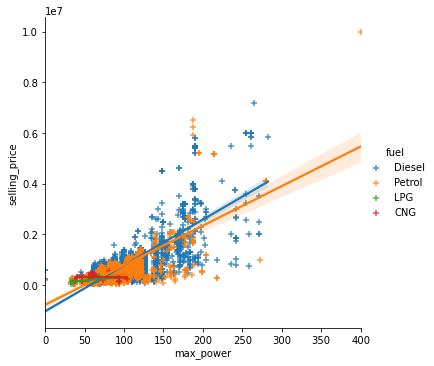

In [81]:
plt.figure(figsize=(10,6))
sns.lmplot(x='max_power',y='selling_price',markers='+',data=car_details,hue='fuel')

<Figure size 720x432 with 0 Axes>

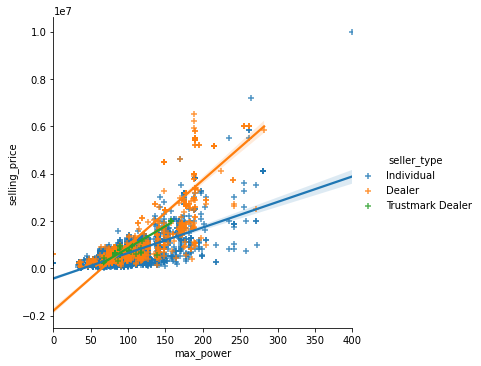

In [82]:
plt.figure(figsize=(10,6))
sns.lmplot(x='max_power',y='selling_price',markers='+',data=car_details,hue='seller_type')

<Figure size 720x432 with 0 Axes>

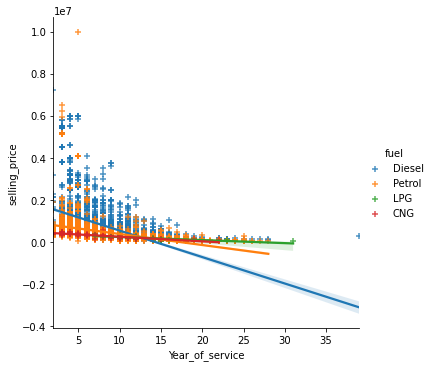

In [83]:
plt.figure(figsize=(10,6))
sns.lmplot(x='Year_of_service',y='selling_price',markers='+',data=car_details,hue='fuel')

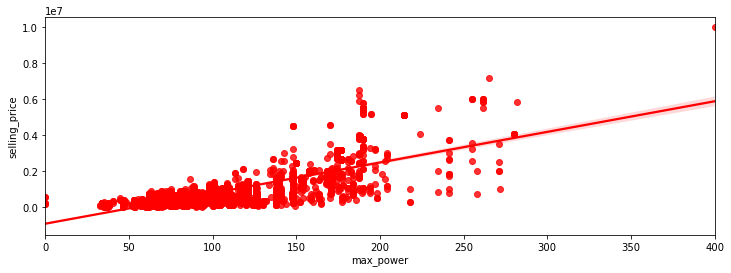

In [84]:
plt.figure(figsize=(12,4))
sns.regplot(x='max_power', y='selling_price', data=car_details,marker ='o',color='red')
plt.show()

### From the exploratory Data Analysis we can say that if any car has high value of max_power and if it's Diesel driven as well as seller type is 'Dealer' and if its transmission type is 'Automatic' then its price will be higher. More over higher the year of service lower the selling price is also noticed.

In [85]:
car_details

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Year_of_service
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,8
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,8
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,16
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,12
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,9
Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,15
Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,13


In [86]:
car_details[car_details['Year_of_service']==38]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Year_of_service
name,,,,,,,,,,,,


## We are keeping 'Year_of_service' column instead we are removing 'year' column. 

In [87]:
car_details = car_details.drop('year',axis=1)

## We are also removing 'seats' column as it doesn't seem to be a good predictor of 'selling_price'

In [88]:
car_details = car_details.drop('seats', axis=1)

In [89]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8128 entries, Maruti Swift Dzire VDI to Tata Indigo CR4
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   selling_price    8128 non-null   int64  
 1   km_driven        8128 non-null   int64  
 2   fuel             8128 non-null   object 
 3   seller_type      8128 non-null   object 
 4   transmission     8128 non-null   object 
 5   owner            8128 non-null   object 
 6   mileage          7907 non-null   float64
 7   engine           7907 non-null   float64
 8   max_power        7912 non-null   float64
 9   Year_of_service  8128 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 827.5+ KB


In [90]:
car_details.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Year_of_service
name,,,,,,,,,,
Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,8
Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,8
Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,16
Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,12
Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,15


## Dropping all the null values

In [91]:
car_details = car_details.dropna()

In [92]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, Maruti Swift Dzire VDI to Tata Indigo CR4
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   selling_price    7906 non-null   int64  
 1   km_driven        7906 non-null   int64  
 2   fuel             7906 non-null   object 
 3   seller_type      7906 non-null   object 
 4   transmission     7906 non-null   object 
 5   owner            7906 non-null   object 
 6   mileage          7906 non-null   float64
 7   engine           7906 non-null   float64
 8   max_power        7906 non-null   float64
 9   Year_of_service  7906 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 679.4+ KB


In [93]:
car_details.head(10)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Year_of_service
name,,,,,,,,,,
Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,8
Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,8
Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,16
Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,12
Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,15
Hyundai Xcent 1.2 VTVT E Plus,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5
Maruti Wagon R LXI DUO BSIII,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,15
Maruti 800 DX BSII,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,21
Toyota Etios VXD,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,11


In [94]:
car_details.shape

(7906, 10)

## Separating Predictor and Target attribute

In [95]:
X = car_details.drop('selling_price', axis = 1)
y = car_details['selling_price']

In [96]:
X.head()

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Year_of_service
name,,,,,,,,,
Maruti Swift Dzire VDI,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,8
Skoda Rapid 1.5 TDI Ambition,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,8
Honda City 2017-2020 EXi,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,16
Hyundai i20 Sportz Diesel,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,12
Maruti Swift VXI BSIII,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,15


In [97]:
y

name
Maruti Swift Dzire VDI          450000
Skoda Rapid 1.5 TDI Ambition    370000
Honda City 2017-2020 EXi        158000
Hyundai i20 Sportz Diesel       225000
Maruti Swift VXI BSIII          130000
                                 ...  
Hyundai i20 Magna               320000
Hyundai Verna CRDi SX           135000
Maruti Swift Dzire ZDi          382000
Tata Indigo CR4                 290000
Tata Indigo CR4                 290000
Name: selling_price, Length: 7906, dtype: int64

## Doing the train-test split

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=42)

In [100]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5534, 9), (2372, 9), (5534,), (2372,))

In [101]:
len(X_train)/len(car_details)

0.6999747027573995

In [102]:
len(X_test)/len(car_details)

0.3000252972426006

In [103]:
X_train.head()

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Year_of_service
name,,,,,,,,,
Hyundai i20 Active 1.4 SX,108000,Diesel,Individual,Manual,First Owner,21.19,1396.0,88.73,7
Toyota Corolla Altis JS MT,50000,Petrol,Individual,Manual,First Owner,14.28,1798.0,138.03,7
Tata Manza Club Class Quadrajet90 LS,50000,Diesel,Individual,Manual,First Owner,21.02,1248.0,88.80,9
Tata Indigo CR4,100000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,9
Mahindra Bolero Power Plus ZLX,14000,Diesel,Individual,Manual,First Owner,16.50,1493.0,70.00,3


In [104]:
X_test.head()

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Year_of_service
name,,,,,,,,,
Maruti Swift VDI,68000,Diesel,Dealer,Manual,First Owner,22.90,1248.0,74.0,8
Maruti Swift Dzire VDI,110000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.0,7
Tata Indica Vista TDI LX,185000,Diesel,Individual,Manual,Second Owner,19.40,1405.0,70.0,10
Toyota Corolla Altis Diesel D4DJ,90000,Diesel,Individual,Manual,Fourth & Above Owner,21.43,1364.0,87.2,10
Maruti Ignis 1.2 AMT Zeta BSIV,15000,Petrol,Individual,Automatic,First Owner,20.89,1197.0,81.8,4


In [105]:
y_train

name
Hyundai i20 Active 1.4 SX                  600000
Toyota Corolla Altis JS MT                1100000
Tata Manza Club Class Quadrajet90 LS       250000
Tata Indigo CR4                            250000
Mahindra Bolero Power Plus ZLX             740000
                                           ...   
Maruti Baleno Alpha 1.2                    711000
Honda Brio 1.2 VX MT                       411000
Hyundai Accent GLX                         110000
BMW 3 Series 320d Corporate Edition        900000
Hyundai Elite i20 Asta Option CVT BSIV     800000
Name: selling_price, Length: 5534, dtype: int64

In [106]:
y_test

name
Maruti Swift VDI                               501000
Maruti Swift Dzire VDI                         440000
Tata Indica Vista TDI LX                       140000
Toyota Corolla Altis Diesel D4DJ               476999
Maruti Ignis 1.2 AMT Zeta BSIV                 620000
                                                ...  
Hyundai EON Era Plus                           220000
Chevrolet Beat Diesel LT                       175000
Tata Tigor 1.2 Revotron XZA                    525000
Mahindra Scorpio 1.99 S4 Plus                  650000
Volkswagen Ameo 1.5 TDI Highline Plus 16 AT    650000
Name: selling_price, Length: 2372, dtype: int64

## Separating Numerical and categorical attributes in the train set

In [107]:
X_train_num = X_train.drop(['fuel','seller_type','transmission','owner'],axis = 1)
X_train_cat = X_train[['fuel','seller_type','transmission','owner']]

In [108]:
X_train_num.head()

,km_driven,mileage,engine,max_power,Year_of_service
name,,,,,
Hyundai i20 Active 1.4 SX,108000,21.19,1396.0,88.73,7
Toyota Corolla Altis JS MT,50000,14.28,1798.0,138.03,7
Tata Manza Club Class Quadrajet90 LS,50000,21.02,1248.0,88.80,9
Tata Indigo CR4,100000,23.57,1396.0,70.00,9
Mahindra Bolero Power Plus ZLX,14000,16.50,1493.0,70.00,3


In [109]:
X_train_cat.head()

,fuel,seller_type,transmission,owner
name,,,,
Hyundai i20 Active 1.4 SX,Diesel,Individual,Manual,First Owner
Toyota Corolla Altis JS MT,Petrol,Individual,Manual,First Owner
Tata Manza Club Class Quadrajet90 LS,Diesel,Individual,Manual,First Owner
Tata Indigo CR4,Diesel,Individual,Manual,First Owner
Mahindra Bolero Power Plus ZLX,Diesel,Individual,Manual,First Owner


### Preprocessing on Numerical Data

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()

In [112]:
X_train_num_scaled = scaler.fit_transform(X_train_num)

In [113]:
X_train_num_scaled

array([[ 0.74734001,  0.43321151, -0.13003947, -0.08307242, -0.2559592 ],
       [-0.36262845, -1.26173661,  0.65817992,  1.27772334, -0.2559592 ],
       [-0.36262845,  0.39151236, -0.42022969, -0.08114025,  0.25651483],
       ...,
       [ 0.40286704, -1.52664891,  0.06407426,  0.06239196,  2.81888502],
       [ 1.64679721, -0.82266901,  1.04444664,  2.46379624,  0.51275185],
       [-0.84106313, -0.49643442, -0.52022767, -0.27270055, -1.02467026]])

In [114]:
X_train_num_scaled.shape

(5534, 5)

In [115]:
X_train_num_columns_scaled_df = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)

In [116]:
X_train_num_columns_scaled_df.head()

,km_driven,mileage,engine,max_power,Year_of_service
0,0.747340,0.433212,-0.130039,-0.083072,-0.255959
1,-0.362628,-1.261737,0.658180,1.277723,-0.255959
2,-0.362628,0.391512,-0.420230,-0.081140,0.256515
3,0.594241,1.017000,-0.130039,-0.600064,0.256515
4,-1.051574,-0.717195,0.060153,-0.600064,-1.280907


### Preprocessing on categorical data

In [117]:
X_train_cat.columns

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

## Dummy Encoding on Train Set

In [118]:
X_train_dummy_columns_df=pd.get_dummies(X_train_cat)

In [119]:
X_train_dummy_columns_df.head()

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
name,,,,,,,,,,,,,,
Hyundai i20 Active 1.4 SX,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Toyota Corolla Altis JS MT,0,0,0,1,0,1,0,0,1,1,0,0,0,0
Tata Manza Club Class Quadrajet90 LS,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Tata Indigo CR4,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Mahindra Bolero Power Plus ZLX,0,1,0,0,0,1,0,0,1,1,0,0,0,0


In [120]:
X_train_num_columns_scaled_df.index

RangeIndex(start=0, stop=5534, step=1)

In [121]:
X_train_dummy_columns_df.index

Index(['Hyundai i20 Active 1.4 SX', 'Toyota Corolla Altis JS MT',
       'Tata Manza Club Class Quadrajet90 LS', 'Tata Indigo CR4',
       'Mahindra Bolero Power Plus ZLX', 'Maruti Omni E MPI STD BS IV',
       'Maruti Wagon R LXI', 'Mahindra Bolero B4',
       'Skoda Rapid Ultima 1.6 TDI Elegance', 'Maruti Wagon R LXI CNG',
       ...
       'Maruti Swift Dzire VDI', 'Hyundai Creta 1.6 CRDi SX',
       'Maruti Swift VXI Deca', 'Maruti Wagon R LXI BSIII',
       'Maruti Alto K10 2010-2014 VXI', 'Maruti Baleno Alpha 1.2',
       'Honda Brio 1.2 VX MT', 'Hyundai Accent GLX',
       'BMW 3 Series 320d Corporate Edition',
       'Hyundai Elite i20 Asta Option CVT BSIV'],
      dtype='object', name='name', length=5534)

In [122]:
X_train_num_columns_scaled_df.index = X_train_dummy_columns_df.index

## Combining Preprocessed Results of train dataset

In [123]:
X_train_final = pd.concat([X_train_num_columns_scaled_df, X_train_dummy_columns_df],axis=1)

In [124]:
X_train_final.head()

,km_driven,mileage,engine,max_power,Year_of_service,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
name,,,,,,,,,,,,,,,,,,,
Hyundai i20 Active 1.4 SX,0.747340,0.433212,-0.130039,-0.083072,-0.255959,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Toyota Corolla Altis JS MT,-0.362628,-1.261737,0.658180,1.277723,-0.255959,0,0,0,1,0,1,0,0,1,1,0,0,0,0
Tata Manza Club Class Quadrajet90 LS,-0.362628,0.391512,-0.420230,-0.081140,0.256515,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Tata Indigo CR4,0.594241,1.017000,-0.130039,-0.600064,0.256515,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Mahindra Bolero Power Plus ZLX,-1.051574,-0.717195,0.060153,-0.600064,-1.280907,0,1,0,0,0,1,0,0,1,1,0,0,0,0


In [125]:
X_train_final.shape

(5534, 19)

In [126]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5534 entries, Hyundai i20 Active 1.4 SX to Hyundai Elite i20 Asta Option CVT BSIV
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   km_driven                     5534 non-null   float64
 1   mileage                       5534 non-null   float64
 2   engine                        5534 non-null   float64
 3   max_power                     5534 non-null   float64
 4   Year_of_service               5534 non-null   float64
 5   fuel_CNG                      5534 non-null   uint8  
 6   fuel_Diesel                   5534 non-null   uint8  
 7   fuel_LPG                      5534 non-null   uint8  
 8   fuel_Petrol                   5534 non-null   uint8  
 9   seller_type_Dealer            5534 non-null   uint8  
 10  seller_type_Individual        5534 non-null   uint8  
 11  seller_type_Trustmark Dealer  5534 non-null   uint8  
 12  transmiss

# Preprocessing on Test Dataset

In [127]:
X_test_num = X_test.drop(['fuel','seller_type','transmission','owner'],axis = 1)
X_test_cat = X_test[['fuel','seller_type','transmission','owner']]

In [128]:
X_test_num.head()

,km_driven,mileage,engine,max_power,Year_of_service
name,,,,,
Maruti Swift VDI,68000,22.90,1248.0,74.0,8
Maruti Swift Dzire VDI,110000,26.59,1248.0,74.0,7
Tata Indica Vista TDI LX,185000,19.40,1405.0,70.0,10
Toyota Corolla Altis Diesel D4DJ,90000,21.43,1364.0,87.2,10
Maruti Ignis 1.2 AMT Zeta BSIV,15000,20.89,1197.0,81.8,4


In [129]:
X_test_cat.head()

,fuel,seller_type,transmission,owner
name,,,,
Maruti Swift VDI,Diesel,Dealer,Manual,First Owner
Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
Tata Indica Vista TDI LX,Diesel,Individual,Manual,Second Owner
Toyota Corolla Altis Diesel D4DJ,Diesel,Individual,Manual,Fourth & Above Owner
Maruti Ignis 1.2 AMT Zeta BSIV,Petrol,Individual,Automatic,First Owner


### Preprocessing on numerical data

In [130]:
X_test_num_scaled = scaler.transform(X_test_num)

In [131]:
X_test_num_scaled

array([[-1.81554809e-02,  8.52655986e-01, -4.20229692e-01,
        -4.89655006e-01,  2.77813898e-04],
       [ 7.85614782e-01,  1.75777300e+00, -4.20229692e-01,
        -4.89655006e-01, -2.55959205e-01],
       [ 2.22091882e+00, -5.85609043e-03, -1.12392766e-01,
        -6.00064398e-01,  5.12751851e-01],
       ...,
       [-9.42051124e-01,  2.14904158e-01, -5.16306185e-01,
        -2.13631525e-01, -7.68433241e-01],
       [ 1.55111027e+00, -9.87012749e-01,  1.04836813e+00,
         7.80053005e-01, -2.55959205e-01],
       [ 2.49767940e-01,  5.65667663e-01,  6.99564958e-02,
         4.65938284e-01, -1.02467026e+00]])

In [132]:
X_test_num_scaled.shape

(2372, 5)

In [133]:
X_test_num_columns_scaled_df = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)

In [134]:
X_train_num_columns_scaled_df.head()

,km_driven,mileage,engine,max_power,Year_of_service
name,,,,,
Hyundai i20 Active 1.4 SX,0.747340,0.433212,-0.130039,-0.083072,-0.255959
Toyota Corolla Altis JS MT,-0.362628,-1.261737,0.658180,1.277723,-0.255959
Tata Manza Club Class Quadrajet90 LS,-0.362628,0.391512,-0.420230,-0.081140,0.256515
Tata Indigo CR4,0.594241,1.017000,-0.130039,-0.600064,0.256515
Mahindra Bolero Power Plus ZLX,-1.051574,-0.717195,0.060153,-0.600064,-1.280907


### Preprocessing on categorical data

In [135]:
X_test_dummy_columns_df=pd.get_dummies(X_test_cat)

In [136]:
X_test_dummy_columns_df.head()

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
name,,,,,,,,,,,,,,
Maruti Swift VDI,0,1,0,0,1,0,0,0,1,1,0,0,0,0
Maruti Swift Dzire VDI,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Tata Indica Vista TDI LX,0,1,0,0,0,1,0,0,1,0,0,1,0,0
Toyota Corolla Altis Diesel D4DJ,0,1,0,0,0,1,0,0,1,0,1,0,0,0
Maruti Ignis 1.2 AMT Zeta BSIV,0,0,0,1,0,1,0,1,0,1,0,0,0,0


In [137]:
X_test_dummy_columns_df.index

Index(['Maruti Swift VDI', 'Maruti Swift Dzire VDI',
       'Tata Indica Vista TDI LX', 'Toyota Corolla Altis Diesel D4DJ',
       'Maruti Ignis 1.2 AMT Zeta BSIV', 'Honda City 1.5 V MT',
       'Hyundai Xcent 1.2 VTVT E', 'Hyundai Verna CRDi', 'Maruti 800 AC BSIII',
       'Toyota Corolla Altis Diesel D4DG',
       ...
       'Hyundai Grand i10 1.2 Kappa Asta', 'Tata Hexa XT',
       'Mahindra Bolero 2011-2019 DI BSIII', 'Maruti Zen Estilo LX BSIV',
       'Maruti 800 Std MPFi', 'Hyundai EON Era Plus',
       'Chevrolet Beat Diesel LT', 'Tata Tigor 1.2 Revotron XZA',
       'Mahindra Scorpio 1.99 S4 Plus',
       'Volkswagen Ameo 1.5 TDI Highline Plus 16 AT'],
      dtype='object', name='name', length=2372)

In [138]:
X_test_num_columns_scaled_df.index

RangeIndex(start=0, stop=2372, step=1)

In [139]:
X_test_dummy_columns_df.index = X_test_num_columns_scaled_df.index

In [140]:
X_test_final = pd.concat([X_test_num_columns_scaled_df, X_test_dummy_columns_df],axis=1)

## Checking the shape of both train and test set

In [141]:
X_test_final.shape

(2372, 19)

In [142]:
X_train_final.shape

(5534, 19)

# Applying the Model

# Ordinary Least Square

In [143]:
import statsmodels.api as sm

In [144]:
x_train_const = sm.add_constant(X_train_final)

In [145]:
x_train_const[:5]

,const,km_driven,mileage,engine,max_power,Year_of_service,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
name,,,,,,,,,,,,,,,,,,,,
Hyundai i20 Active 1.4 SX,1.0,0.747340,0.433212,-0.130039,-0.083072,-0.255959,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Toyota Corolla Altis JS MT,1.0,-0.362628,-1.261737,0.658180,1.277723,-0.255959,0,0,0,1,0,1,0,0,1,1,0,0,0,0
Tata Manza Club Class Quadrajet90 LS,1.0,-0.362628,0.391512,-0.420230,-0.081140,0.256515,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Tata Indigo CR4,1.0,0.594241,1.017000,-0.130039,-0.600064,0.256515,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Mahindra Bolero Power Plus ZLX,1.0,-1.051574,-0.717195,0.060153,-0.600064,-1.280907,0,1,0,0,0,1,0,0,1,1,0,0,0,0


In [146]:
y_train[:5]

name
Hyundai i20 Active 1.4 SX                600000
Toyota Corolla Altis JS MT              1100000
Tata Manza Club Class Quadrajet90 LS     250000
Tata Indigo CR4                          250000
Mahindra Bolero Power Plus ZLX           740000
Name: selling_price, dtype: int64

In [147]:
x_train_const.shape

(5534, 20)

In [148]:
y_train.shape

(5534,)

In [149]:
ols_model = sm.OLS( y_train, x_train_const)

In [150]:
results = ols_model.fit()

In [151]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     786.7
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:07:50   Log-Likelihood:                -79984.
No. Observations:                5534   AIC:                         1.600e+05
Df Residuals:                    5518   BIC:                         1.601e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Interpretation: After doing multiple regression we can understand from the adjusted R square value that, the model can describe 68.10% of the variability of the dependent variable(selling_price) . But after building the model we can see that all independent variables have p value lower than 0.05 except 'fuel_CNG' and 'fuel_Petrol' which have p-values 0.069 and 0.066 respectively. So at 95% confidence level we can say that, these two independent variables can be identified as non-significant variables or for these two variables we 'fail to reject the null hypothesis' .  So we are removing these two variables and then building a new model

In [152]:
x_train_const = x_train_const.drop(['fuel_CNG','fuel_Petrol'], axis=1)

In [153]:
x_train_const.shape

(5534, 18)

In [154]:
y_train.shape

(5534,)

In [155]:
ols_model1 = sm.OLS(y_train, x_train_const).fit()

In [156]:
print(ols_model1.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     842.9
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:12:51   Log-Likelihood:                -79984.
No. Observations:                5534   AIC:                         1.600e+05
Df Residuals:                    5519   BIC:                         1.601e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Here we can see that all independent variables have p-value lower than 0.05 i.e, all the independent variables are significant. But the Adjusted R square value is same as 68.10% as the previous one. So we can go with this model 

In [158]:
y_train_hat = ols_model1.predict(x_train_const)

In [159]:
y_train_hat

name
Hyundai i20 Active 1.4 SX                 5.530059e+05
Toyota Corolla Altis JS MT                1.140795e+06
Tata Manza Club Class Quadrajet90 LS      5.669138e+05
Tata Indigo CR4                           3.020814e+05
Mahindra Bolero Power Plus ZLX            5.009442e+05
                                              ...     
Maruti Baleno Alpha 1.2                   6.888752e+05
Honda Brio 1.2 VX MT                      4.753868e+05
Hyundai Accent GLX                        8.401065e+04
BMW 3 Series 320d Corporate Edition       1.942207e+06
Hyundai Elite i20 Asta Option CVT BSIV    1.010299e+06
Length: 5534, dtype: float64

In [160]:
concat_train_pred_df = pd.concat([y_train, y_train_hat],axis=1)

In [162]:
concat_train_pred_df

,selling_price,0
name,,
Hyundai i20 Active 1.4 SX,600000,5.530059e+05
Toyota Corolla Altis JS MT,1100000,1.140795e+06
Tata Manza Club Class Quadrajet90 LS,250000,5.669138e+05
Tata Indigo CR4,250000,3.020814e+05
Mahindra Bolero Power Plus ZLX,740000,5.009442e+05
...,...,...
Maruti Baleno Alpha 1.2,711000,6.888752e+05
Honda Brio 1.2 VX MT,411000,4.753868e+05
Hyundai Accent GLX,110000,8.401065e+04


In [163]:
concat_train_pred_df.columns = ['selling_price', 'predicted selling price']

In [164]:
concat_train_pred_df

,selling_price,predicted selling price
name,,
Hyundai i20 Active 1.4 SX,600000,5.530059e+05
Toyota Corolla Altis JS MT,1100000,1.140795e+06
Tata Manza Club Class Quadrajet90 LS,250000,5.669138e+05
Tata Indigo CR4,250000,3.020814e+05
Mahindra Bolero Power Plus ZLX,740000,5.009442e+05
...,...,...
Maruti Baleno Alpha 1.2,711000,6.888752e+05
Honda Brio 1.2 VX MT,411000,4.753868e+05
Hyundai Accent GLX,110000,8.401065e+04


In [165]:
from sklearn.metrics import mean_squared_error

In [166]:
print("Mean squared error for train set: %.2f" % mean_squared_error(y_train, y_train_hat))

Mean squared error for train set: 209602631359.23


In [167]:
print("Root Mean squared error for train set: %.2f" % np.sqrt(mean_squared_error(y_train, y_train_hat)))

Root Mean squared error for train set: 457823.80


# Predicting Test Set

In [168]:
x_test_const = sm.add_constant(X_test_final)

In [169]:
x_test_const = x_test_const.drop(['fuel_CNG','fuel_Petrol'], axis=1)

In [170]:
# Predicting test set
y_test_hat = ols_model1.predict(x_test_const)

In [171]:
# Predicted test set
y_test_hat

0       6.369807e+05
1       4.332723e+05
2       3.823913e+04
3       5.120764e+05
4       1.075969e+06
            ...     
2367    2.800759e+04
2368    1.774283e+05
2369    1.287281e+06
2370    8.433460e+05
2371    1.401439e+06
Length: 2372, dtype: float64

In [172]:
# actual test set
y_test

name
Maruti Swift VDI                               501000
Maruti Swift Dzire VDI                         440000
Tata Indica Vista TDI LX                       140000
Toyota Corolla Altis Diesel D4DJ               476999
Maruti Ignis 1.2 AMT Zeta BSIV                 620000
                                                ...  
Hyundai EON Era Plus                           220000
Chevrolet Beat Diesel LT                       175000
Tata Tigor 1.2 Revotron XZA                    525000
Mahindra Scorpio 1.99 S4 Plus                  650000
Volkswagen Ameo 1.5 TDI Highline Plus 16 AT    650000
Name: selling_price, Length: 2372, dtype: int64

In [173]:
x_test_const.shape

(2372, 18)

In [175]:
y_test_hat.index = y_test.index

In [176]:
concat_test_pred_df = pd.concat([y_test, y_test_hat],axis=1)

In [177]:
concat_test_pred_df

,selling_price,0
name,,
Maruti Swift VDI,501000,6.369807e+05
Maruti Swift Dzire VDI,440000,4.332723e+05
Tata Indica Vista TDI LX,140000,3.823913e+04
Toyota Corolla Altis Diesel D4DJ,476999,5.120764e+05
Maruti Ignis 1.2 AMT Zeta BSIV,620000,1.075969e+06
...,...,...
Hyundai EON Era Plus,220000,2.800759e+04
Chevrolet Beat Diesel LT,175000,1.774283e+05
Tata Tigor 1.2 Revotron XZA,525000,1.287281e+06


In [178]:
concat_test_pred_df.columns = ['selling_price', 'predicted selling price']

In [179]:
concat_test_pred_df

,selling_price,predicted selling price
name,,
Maruti Swift VDI,501000,6.369807e+05
Maruti Swift Dzire VDI,440000,4.332723e+05
Tata Indica Vista TDI LX,140000,3.823913e+04
Toyota Corolla Altis Diesel D4DJ,476999,5.120764e+05
Maruti Ignis 1.2 AMT Zeta BSIV,620000,1.075969e+06
...,...,...
Hyundai EON Era Plus,220000,2.800759e+04
Chevrolet Beat Diesel LT,175000,1.774283e+05
Tata Tigor 1.2 Revotron XZA,525000,1.287281e+06


In [180]:
print("Mean squared error for train set: %.2f" % mean_squared_error(y_test, y_test_hat))

print("Root Mean squared error for train set: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_hat)))

Mean squared error for train set: 210086685971.69
Root Mean squared error for train set: 458352.14


In [181]:
from sklearn.metrics import r2_score

In [182]:
# r2 score for Test set
r2_score(y_test, y_test_hat)

0.6870086258321442

In [183]:
# r2 score for train set
r2_score(y_train, y_train_hat)

0.6813523477895884

### Checking the residuals

In [184]:
res_ols = y_test - y_test_hat

### Distribution of residual

<AxesSubplot:ylabel='Count'>

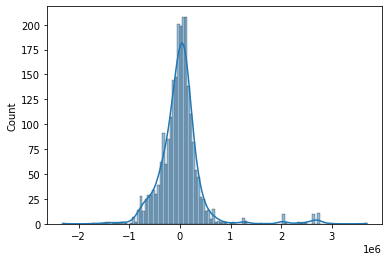

In [185]:
sns.histplot(res_ols, kde=True)

## showing scatterplot and best-fit line between actual value and predicted value

C:\Users\rajde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

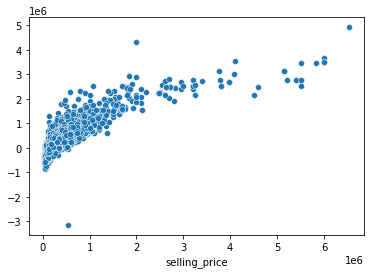

In [186]:
sns.scatterplot(y_test, y_test_hat)

C:\Users\rajde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

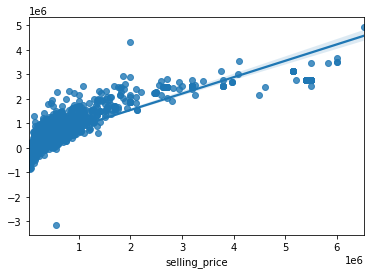

In [187]:
sns.regplot(y_test, y_test_hat)

#### Above is the best fit line after Ordinary Least Square method. The model can describe 68% variability of the dependent variables 

# KNN (K-Nearest Neighbors)

In [184]:
from sklearn.neighbors import KNeighborsRegressor as KNR

In [185]:
model = KNR(n_neighbors = 3)    # Initially assigning the k value as 3 i.e. it will check for 3 nearest neighbours

In [186]:
model.fit(X_train_final, y_train)

KNeighborsRegressor(n_neighbors=3)

In [187]:
y_train_pred_KNR = model.predict(X_train_final)

## Checking the values for first 5 instances of the train set

#### Estimated Value

In [188]:
y_train_pred_KNR[:5]

array([ 576666.66666667, 1025000.        ,  295000.        ,
        296666.66666667,  663333.33333333])

#### Predicted Value

In [189]:
y_train[:5]

name
Hyundai i20 Active 1.4 SX                600000
Toyota Corolla Altis JS MT              1100000
Tata Manza Club Class Quadrajet90 LS     250000
Tata Indigo CR4                          250000
Mahindra Bolero Power Plus ZLX           740000
Name: selling_price, dtype: int64

### Predicting test set

In [190]:
y_test_pred_KNR = model.predict(X_test_final)

In [191]:
y_test_pred_KNR

array([310333.        , 540000.        , 166000.        , ...,
       523333.33333333, 845000.        , 830000.        ])

## Checking the estimated value for first 5 instances of the test set

#### Actual Value

In [192]:
y_test[:5]

name
Maruti Swift VDI                    501000
Maruti Swift Dzire VDI              440000
Tata Indica Vista TDI LX            140000
Toyota Corolla Altis Diesel D4DJ    476999
Maruti Ignis 1.2 AMT Zeta BSIV      620000
Name: selling_price, dtype: int64

#### Estimated Value

In [193]:
y_test_pred_KNR[:5]

array([310333.        , 540000.        , 166000.        , 356666.66666667,
       708333.33333333])

### Root Mean Squared Error for the Train Set

In [194]:
train_rmse_error_KNR = np.sqrt(mean_squared_error(y_train, y_train_pred_KNR))

In [195]:
train_rmse_error_KNR

127589.0903209272

In [196]:
r2_score(y_train, y_train_pred_KNR)

0.9752519448861483

### Root Mean Square Error for the Test Set

In [197]:
test_rmse_error_KNR = np.sqrt(mean_squared_error(y_test, y_test_pred_KNR))

In [198]:
test_rmse_error_KNR

170007.59154506793

In [199]:
r2_score(y_test, y_test_pred_KNR)

0.9569403526948396

C:\Users\rajde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

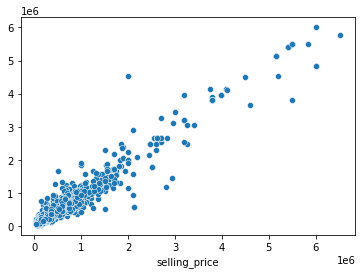

In [200]:
sns.scatterplot(y_test, y_test_pred_KNR)

C:\Users\rajde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

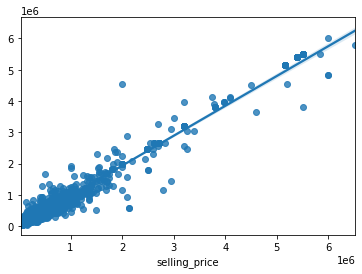

In [201]:
sns.regplot(y_test, y_test_pred_KNR)

In [202]:
y_test[:8]

name
Maruti Swift VDI                    501000
Maruti Swift Dzire VDI              440000
Tata Indica Vista TDI LX            140000
Toyota Corolla Altis Diesel D4DJ    476999
Maruti Ignis 1.2 AMT Zeta BSIV      620000
Honda City 1.5 V MT                 380000
Hyundai Xcent 1.2 VTVT E            360000
Hyundai Verna CRDi                  185000
Name: selling_price, dtype: int64

In [203]:
y_test_pred_KNR[:8]

array([310333.        , 540000.        , 166000.        , 356666.66666667,
       708333.33333333, 355000.        , 441666.33333333, 190000.        ])

In [204]:
pred_ser = pd.Series(y_test_pred_KNR, name='Predicted_Selling_Price')

In [205]:
pred_ser

0       310333.000000
1       540000.000000
2       166000.000000
3       356666.666667
4       708333.333333
            ...      
2367    225000.000000
2368    171666.666667
2369    523333.333333
2370    845000.000000
2371    830000.000000
Name: Predicted_Selling_Price, Length: 2372, dtype: float64

In [206]:
pred_ser.index = y_test.index 

In [207]:
pred_ser

name
Maruti Swift VDI                               310333.000000
Maruti Swift Dzire VDI                         540000.000000
Tata Indica Vista TDI LX                       166000.000000
Toyota Corolla Altis Diesel D4DJ               356666.666667
Maruti Ignis 1.2 AMT Zeta BSIV                 708333.333333
                                                   ...      
Hyundai EON Era Plus                           225000.000000
Chevrolet Beat Diesel LT                       171666.666667
Tata Tigor 1.2 Revotron XZA                    523333.333333
Mahindra Scorpio 1.99 S4 Plus                  845000.000000
Volkswagen Ameo 1.5 TDI Highline Plus 16 AT    830000.000000
Name: Predicted_Selling_Price, Length: 2372, dtype: float64

In [208]:
y_test

name
Maruti Swift VDI                               501000
Maruti Swift Dzire VDI                         440000
Tata Indica Vista TDI LX                       140000
Toyota Corolla Altis Diesel D4DJ               476999
Maruti Ignis 1.2 AMT Zeta BSIV                 620000
                                                ...  
Hyundai EON Era Plus                           220000
Chevrolet Beat Diesel LT                       175000
Tata Tigor 1.2 Revotron XZA                    525000
Mahindra Scorpio 1.99 S4 Plus                  650000
Volkswagen Ameo 1.5 TDI Highline Plus 16 AT    650000
Name: selling_price, Length: 2372, dtype: int64

In [209]:
type(y_test)

pandas.core.series.Series

In [210]:
type(pred_ser)

pandas.core.series.Series

In [211]:
concat_pred_df = pd.concat([y_test, pred_ser],axis=1)

In [212]:
concat_pred_df.columns

Index(['selling_price', 'Predicted_Selling_Price'], dtype='object')

In [213]:
concat_pred_df

,selling_price,Predicted_Selling_Price
name,,
Maruti Swift VDI,501000,310333.000000
Maruti Swift Dzire VDI,440000,540000.000000
Tata Indica Vista TDI LX,140000,166000.000000
Toyota Corolla Altis Diesel D4DJ,476999,356666.666667
Maruti Ignis 1.2 AMT Zeta BSIV,620000,708333.333333
...,...,...
Hyundai EON Era Plus,220000,225000.000000
Chevrolet Beat Diesel LT,175000,171666.666667
Tata Tigor 1.2 Revotron XZA,525000,523333.333333


## Trying different value of K to check which value gives lowest RMSE

In [214]:
rmse_val_list = [] #to store rmse values for different k
r2_list = []

for K in range(20):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(X_train_final, y_train)  #fit the model
    y_pred = model.predict(X_test_final) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test, y_pred)) #calculate rmse
    r2 = r2_score(y_test, y_pred)
    print('RMSE value for k= ' , K , 'is:', error)
    print('R2 score for value k= ', K ,'is:', r2)
    
    rmse_val_list.append(error) #store rmse values
    r2_list.append(r2)
    
print("The maximum R2 score we get is", max(r2_list))    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))

RMSE value for k=  1 is: 198692.7778499091
R2 score for value k=  1 is: 0.9411836592324035
RMSE value for k=  2 is: 193677.20195715927
R2 score for value k=  2 is: 0.9441155677620987
RMSE value for k=  3 is: 170007.59154506793
R2 score for value k=  3 is: 0.9569403526948396
RMSE value for k=  4 is: 174475.7493304889
R2 score for value k=  4 is: 0.954647212726148
RMSE value for k=  5 is: 178009.90693949317
R2 score for value k=  5 is: 0.9527912843976141
RMSE value for k=  6 is: 178461.05250975778
R2 score for value k=  6 is: 0.9525516910856007
RMSE value for k=  7 is: 182364.29931329985
R2 score for value k=  7 is: 0.9504534427126546
RMSE value for k=  8 is: 184751.4136501303
R2 score for value k=  8 is: 0.9491478430389919
RMSE value for k=  9 is: 189597.0999976965
R2 score for value k=  9 is: 0.9464453458477298
RMSE value for k=  10 is: 191791.71727707767
R2 score for value k=  10 is: 0.9451983626899788
RMSE value for k=  11 is: 197502.2716724623
R2 score for value k=  11 is: 0.9418863

## For Test Dataset we are taking K value as the square root of Total Test Dataset and checking which K value gives lowest RMSE 

In [215]:
rmse_val_list = list() #to store rmse values for different k
rmse_val_df = pd.DataFrame(columns=["K","Error"])

iter_len = len(X_test_final)
iter_size = round(np.sqrt(iter_len))

for K in range(iter_size):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(X_train_final, y_train)  #fit the model
    y_pred = model.predict(X_test_final) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test, y_pred)) #calculate rmse
    
    
    rmse_val_list.append(error) #store rmse values
    rmse_val_df = rmse_val_df.append({'K':K,'Error':error}, ignore_index=True) # Appending the value of k and error to the dataframe
    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))


The minimum error we get is  170007.59154506793
The corresponding K value is  3


In [216]:
rmse_df = pd.DataFrame(rmse_val_df).set_index('K')
rmse_df[:10]

,Error
K,
1.0,198692.777850
2.0,193677.201957
3.0,170007.591545
4.0,174475.749330
5.0,178009.906939
6.0,178461.052510
7.0,182364.299313
8.0,184751.413650
9.0,189597.099998


<AxesSubplot:xlabel='K'>

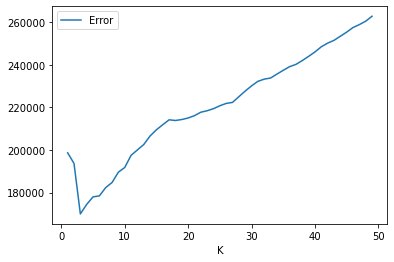

In [217]:
rmse_df.plot()

## After k=3 the error value is gradually increasing. So we will take the value of k as 3. So we can say that if any new instance has an entry to the dataset then for predicting its selling price we have to take 3 nearest neighbors

## Grid Search

In [218]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': np.arange(3,50,2),'weights':['uniform', 'distance'],'p':[1,2]}

In [219]:
gserach = GridSearchCV(estimator=model,param_grid=params,cv=5)

gserach.fit(X_train_final,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=49),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [220]:
gserach.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [221]:
model_best = KNR(n_neighbors = 5, p=1,weights='distance')

In [222]:
model_best.fit(X_train_final, y_train)

KNeighborsRegressor(p=1, weights='distance')

In [223]:
y_train_pred_KNR = model_best.predict(X_train_final)

In [224]:
y_test_pred_KNR = model_best.predict(X_test_final)

In [225]:
y_train

name
Hyundai i20 Active 1.4 SX                  600000
Toyota Corolla Altis JS MT                1100000
Tata Manza Club Class Quadrajet90 LS       250000
Tata Indigo CR4                            250000
Mahindra Bolero Power Plus ZLX             740000
                                           ...   
Maruti Baleno Alpha 1.2                    711000
Honda Brio 1.2 VX MT                       411000
Hyundai Accent GLX                         110000
BMW 3 Series 320d Corporate Edition        900000
Hyundai Elite i20 Asta Option CVT BSIV     800000
Name: selling_price, Length: 5534, dtype: int64

In [226]:
y_train_pred_KNR

array([ 600000., 1100000.,  250000., ...,  110000.,  900000.,  800000.])

In [227]:
r2_score(y_train, y_train_pred_KNR)

0.9996181724914596

In [228]:
np.sqrt(mean_squared_error(y_train, y_train_pred_KNR))

15848.078386521847

In [229]:
y_test

name
Maruti Swift VDI                               501000
Maruti Swift Dzire VDI                         440000
Tata Indica Vista TDI LX                       140000
Toyota Corolla Altis Diesel D4DJ               476999
Maruti Ignis 1.2 AMT Zeta BSIV                 620000
                                                ...  
Hyundai EON Era Plus                           220000
Chevrolet Beat Diesel LT                       175000
Tata Tigor 1.2 Revotron XZA                    525000
Mahindra Scorpio 1.99 S4 Plus                  650000
Volkswagen Ameo 1.5 TDI Highline Plus 16 AT    650000
Name: selling_price, Length: 2372, dtype: int64

In [230]:
y_test_pred_KNR

array([392561.01859738, 510000.        , 191837.76838308, ...,
       525000.        , 890128.39795075, 905461.51647357])

C:\Users\rajde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

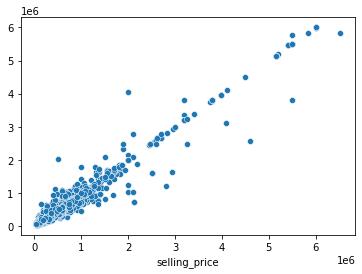

In [231]:
sns.scatterplot(y_test, y_test_pred_KNR)

C:\Users\rajde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

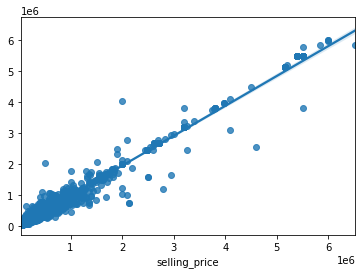

In [232]:
sns.regplot(y_test, y_test_pred_KNR)

## Checking the error and R2 score for test dataset with the parameter after grid search

In [233]:
r2_score(y_test,y_test_pred_KNR)

0.964383126524368

In [234]:
np.sqrt(mean_squared_error(y_test, y_test_pred_KNR))

154618.32973365817

## After Grid Search we got the k value as 5 as the best parameter for which the root mean squared error reduced from 170007.59 to 154618.32 . 
## Changing K value from 3 to 5 gave a low error as well as it also explained the variability of the data a bit better(from 95.69 to 96.43) than the previous k(=3) value. But the change is very minor. So before changing k value we may need to take the opinion from any domain expert. But preferably keeping k value fixed at 3 is good here also as for any new instance this model can explain its price with the mean price of its nearest 3 neighbours taking the distance metric as manhattan distance into consideration as per the best parameters of grid search.

# Future Scope: I can handle outliers, perform some more feature engineering and check the model performance after that. Can use Decision Tree Regressor for checking whether the model is overfitting and after that can do hyperparameter tuning as well as can apply ensemble model(Random Forest) for improving accuracy

# Outliers treatment

In [168]:
car1 = car_details.copy()

In [169]:
car1

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Year_of_service
name,,,,,,,,,,
Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,7
Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,7
Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,15
Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,11
Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,14
...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,8
Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,14
Maruti Swift Dzire ZDi,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,12


## User defined Function for detecting outliers

In [170]:
outliers = []
upper_lim = 0
lower_lim = 0
def outlier_detection(x):
    global outliers
    x_dict = dict(car_details[x].describe())
    print(x_dict)
    Q1 = x_dict['25%']
    print("Q1 :", Q1)
    Q3 = x_dict['75%']
    print("Q3 :", Q3)
    IQR = Q3 - Q1
    print("Inter quartile range is ", IQR)
    global lower_lim
    global upper_lim
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    print("The lower limit is ", round(lower_lim))
    print("The upper limit is ", round(upper_lim))

    for i in car_details[x]:
        if ((i > upper_lim) | (i < lower_lim)):
            outliers.append(i)
#    print("The outliers of ", x ,"is :", outliers)

In [171]:
#def remove_year_of_service_outlier(df):
#    df_out = pd.DataFrame()
#    for key,subdf in df.groupby('fuel'):
#        m=np.mean(subdf.Year_of_service)
#        sd=np.std(subdf.Year_of_service)
#        reduced_df = subdf[(subdf.Year_of_service>(m-sd)) & (subdf.Year_of_service<=(m+sd))]
#        df_out = pd.concat([df_out,reduced_df], ignore_index = True)
#    return df_out
#df6 = remove_year_of_service_outlier(car1)
#df6.shape #Displaying the Shape

In [172]:
outlier_detection('max_power')

{'count': 7906.0, 'mean': 91.58737351378655, 'std': 35.747216084483604, 'min': 32.8, '25%': 68.05, '50%': 82.0, '75%': 102.0, 'max': 400.0}
Q1 : 68.05
Q3 : 102.0
Inter quartile range is  33.95
The lower limit is  17
The upper limit is  153


In [173]:
car1.loc[((car1['max_power']>= 153) & (car1['max_power']<=400)), 'max_power' ]=round(upper_lim)

In [174]:
car1.loc[(car1['max_power']<=17), 'max_power']=round(lower_lim)

Text(0.5, 0, 'Histogram of max_power before outlier treatment')

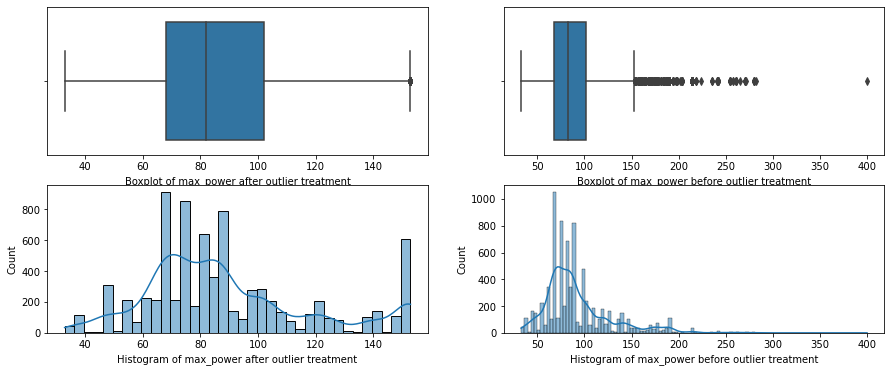

In [175]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
sns.boxplot(x='max_power',data=car1,ax=axes[0,0])
axes[0,0].set_xlabel('Boxplot of max_power after outlier treatment')
sns.boxplot(x='max_power',data=car_details,ax=axes[0,1])
axes[0,1].set_xlabel('Boxplot of max_power before outlier treatment')
sns.histplot(x='max_power',data=car1,kde=True,ax=axes[1,0])
axes[1,0].set_xlabel('Histogram of max_power after outlier treatment')
sns.histplot(x='max_power',data=car_details,kde=True,ax=axes[1,1])
axes[1,1].set_xlabel('Histogram of max_power before outlier treatment')

In [176]:
outliers.clear()
outlier_detection('engine')

{'count': 7906.0, 'mean': 1458.7088287376675, 'std': 503.8930568501434, 'min': 624.0, '25%': 1197.0, '50%': 1248.0, '75%': 1582.0, 'max': 3604.0}
Q1 : 1197.0
Q3 : 1582.0
Inter quartile range is  385.0
The lower limit is  620
The upper limit is  2160


In [177]:
# Outliers above the upper whisker
car1.loc[((car1['engine']>=2160) & (car1['engine']<=3604)), 'engine']=round(upper_lim)

Text(0.5, 0, 'Histogram of engine before outlier treatment')

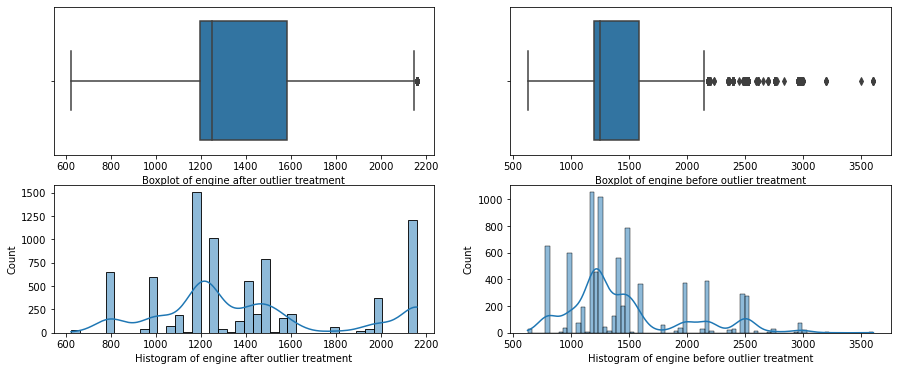

In [178]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
sns.boxplot(x='engine',data=car1,ax=axes[0,0])
axes[0,0].set_xlabel('Boxplot of engine after outlier treatment')
sns.boxplot(x='engine',data=car_details,ax=axes[0,1])
axes[0,1].set_xlabel('Boxplot of engine before outlier treatment')
sns.histplot(x='engine',data=car1,kde=True,ax=axes[1,0])
axes[1,0].set_xlabel('Histogram of engine after outlier treatment')
sns.histplot(x='engine',data=car_details,kde=True,ax=axes[1,1])
axes[1,1].set_xlabel('Histogram of engine before outlier treatment')

In [179]:
outliers.clear()
outlier_detection('mileage')

{'count': 7906.0, 'mean': 19.419860865165674, 'std': 4.036263200758909, 'min': 0.0, '25%': 16.78, '50%': 19.3, '75%': 22.32, 'max': 42.0}
Q1 : 16.78
Q3 : 22.32
Inter quartile range is  5.539999999999999
The lower limit is  8
The upper limit is  31


In [180]:
car1.loc[(car1['mileage'] >= 31),'mileage'] = round(upper_lim)

In [181]:
car1.loc[(car1['mileage'] <= 8),'mileage'] = round(lower_lim)

Text(0.5, 0, 'Histogram of mileage before outlier treatment')

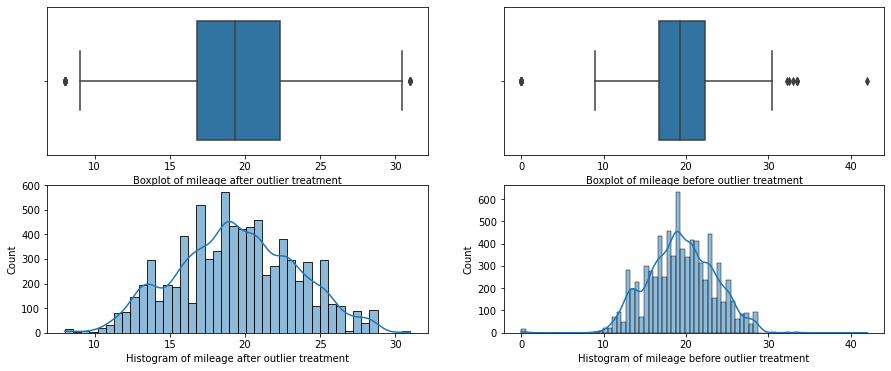

In [182]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
sns.boxplot(x='mileage',data=car1,ax=axes[0,0])
axes[0,0].set_xlabel('Boxplot of mileage after outlier treatment')
sns.boxplot(x='mileage',data=car_details,ax=axes[0,1])
axes[0,1].set_xlabel('Boxplot of mileage before outlier treatment')
sns.histplot(x='mileage',data=car1,kde=True,ax=axes[1,0])
axes[1,0].set_xlabel('Histogram of mileage after outlier treatment')
sns.histplot(x='mileage',data=car_details,kde=True,ax=axes[1,1])
axes[1,1].set_xlabel('Histogram of mileage before outlier treatment')

In [183]:
outliers.clear()
outlier_detection('km_driven')

{'count': 7906.0, 'mean': 69188.65975208703, 'std': 56792.29634331777, 'min': 1.0, '25%': 35000.0, '50%': 60000.0, '75%': 95425.0, 'max': 2360457.0}
Q1 : 35000.0
Q3 : 95425.0
Inter quartile range is  60425.0
The lower limit is  -55638
The upper limit is  186062


In [184]:
min(outliers), max(outliers)

(186388, 2360457)

In [185]:
car1.loc[(car1['km_driven'] >= 186062) & (car1['km_driven'] <= 2360457)]

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Year_of_service
name,,,,,,,,,,
Maruti Swift Dzire ZDi,320000,193000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,9
Mahindra Bolero DI DX 7 Seater,210000,207890,Diesel,Individual,Manual,Second Owner,13.60,2160.0,63.0,14
Toyota Innova 2.5 G1 Diesel 8-seater,250000,240000,Diesel,Individual,Manual,Third Owner,12.80,2160.0,102.0,16
Hyundai Verna XXi ABS (Petrol),340000,214000,Petrol,Individual,Manual,Second Owner,13.90,1599.0,103.2,12
Hyundai Verna CRDi SX,340000,214000,Diesel,Individual,Manual,Second Owner,16.80,1493.0,110.0,12
...,...,...,...,...,...,...,...,...,...,...
Maruti Gypsy King Soft Top,300000,186388,Petrol,Individual,Manual,Second Owner,14.80,1298.0,80.0,24
Toyota Innova 2.5 V Diesel 7-seater,425000,200000,Diesel,Individual,Manual,Second Owner,12.80,2160.0,102.0,11
Toyota Innova 2.5 E 7 STR,550000,250000,Diesel,Individual,Manual,First Owner,12.80,2160.0,102.0,12


In [186]:
car1.loc[(car1['km_driven'] <= -55638)]

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Year_of_service
name,,,,,,,,,,


In [187]:
car1.loc[(car1['km_driven'] >= 186062), 'km_driven'] = round(upper_lim)

Text(0.5, 0, 'Histogram of km_driven before outlier treatment')

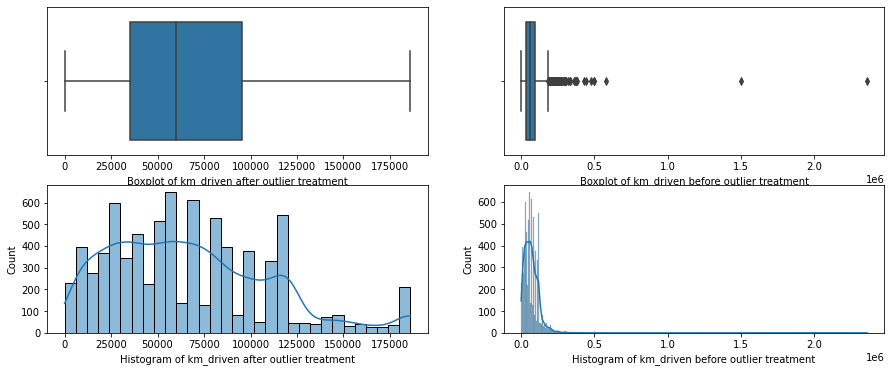

In [188]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
sns.boxplot(x='km_driven',data=car1,ax=axes[0,0])
axes[0,0].set_xlabel('Boxplot of km_driven after outlier treatment')
sns.boxplot(x='km_driven',data=car_details,ax=axes[0,1])
axes[0,1].set_xlabel('Boxplot of km_driven before outlier treatment')
sns.histplot(x='km_driven',data=car1,kde=True,ax=axes[1,0])
axes[1,0].set_xlabel('Histogram of km_driven after outlier treatment')
sns.histplot(x='km_driven',data=car_details,kde=True,ax=axes[1,1])
axes[1,1].set_xlabel('Histogram of km_driven before outlier treatment')

<AxesSubplot:xlabel='Year_of_service'>

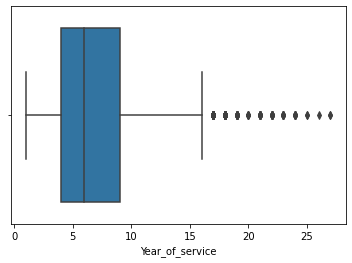

In [189]:
sns.boxplot(x = 'Year_of_service', data=car_details)

In [190]:
outliers.clear()
outlier_detection('Year_of_service')

{'count': 7906.0, 'mean': 7.016063749051353, 'std': 3.863695338703477, 'min': 1.0, '25%': 4.0, '50%': 6.0, '75%': 9.0, 'max': 27.0}
Q1 : 4.0
Q3 : 9.0
Inter quartile range is  5.0
The lower limit is  -4
The upper limit is  16


In [191]:
car1.loc[(car1['Year_of_service'] >= 16)]

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Year_of_service
name,,,,,,,,,,
Maruti 800 DX BSII,45000,5000,Petrol,Individual,Manual,Second Owner,16.1,796.0,37.0,20
Maruti Zen LX,92000,100000,Petrol,Individual,Manual,Second Owner,17.3,993.0,60.0,16
Maruti Alto LX,150000,80000,Petrol,Individual,Manual,Second Owner,19.7,796.0,46.3,19
Maruti 800 Std,40000,40000,Petrol,Individual,Manual,Second Owner,16.1,796.0,37.0,22
Honda City 1.5 EXI,100000,120000,Petrol,Individual,Manual,Second Owner,13.0,1493.0,100.0,16
...,...,...,...,...,...,...,...,...,...,...
Maruti 800 AC,35000,40000,Petrol,Individual,Manual,Second Owner,16.1,796.0,37.0,23
Maruti Gypsy King Soft Top,300000,186062,Petrol,Individual,Manual,Second Owner,14.8,1298.0,80.0,24
Honda City ZXi AT,110000,100000,Petrol,Individual,Automatic,Second Owner,12.0,1493.0,100.0,16


In [192]:
car1.loc[(car1['Year_of_service'] >= 16), 'Year_of_service'] = upper_lim

Text(0.5, 0, 'Histogram of Year_of_service before outlier treatment')

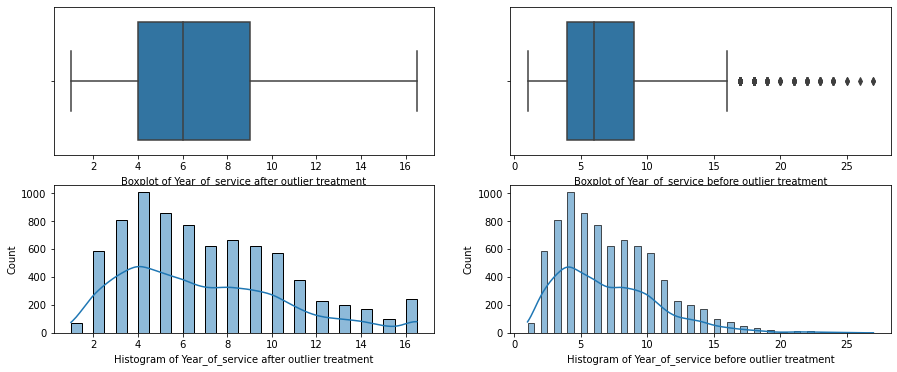

In [193]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
sns.boxplot(x='Year_of_service',data=car1,ax=axes[0,0])
axes[0,0].set_xlabel('Boxplot of Year_of_service after outlier treatment')
sns.boxplot(x='Year_of_service',data=car_details,ax=axes[0,1])
axes[0,1].set_xlabel('Boxplot of Year_of_service before outlier treatment')
sns.histplot(x='Year_of_service',data=car1,kde=True,ax=axes[1,0])
axes[1,0].set_xlabel('Histogram of Year_of_service after outlier treatment')
sns.histplot(x='Year_of_service',data=car_details,kde=True,ax=axes[1,1])
axes[1,1].set_xlabel('Histogram of Year_of_service before outlier treatment')

In [194]:
COR = car1.corr()

In [195]:
COR

,selling_price,km_driven,mileage,engine,max_power,Year_of_service
selling_price,1.000000,-0.283516,-0.132284,0.465756,0.636362,-0.421635
km_driven,-0.283516,1.000000,-0.195357,0.229859,-0.022311,0.542609
mileage,-0.132284,-0.195357,1.000000,-0.571331,-0.402616,-0.335693
engine,0.465756,0.229859,-0.571331,1.000000,0.773844,-0.024097
max_power,0.636362,-0.022311,-0.402616,0.773844,1.000000,-0.222155
Year_of_service,-0.421635,0.542609,-0.335693,-0.024097,-0.222155,1.000000


In [196]:
COR['selling_price'].sort_values(ascending = False)

selling_price      1.000000
max_power          0.636362
engine             0.465756
mileage           -0.132284
km_driven         -0.283516
Year_of_service   -0.421635
Name: selling_price, dtype: float64

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

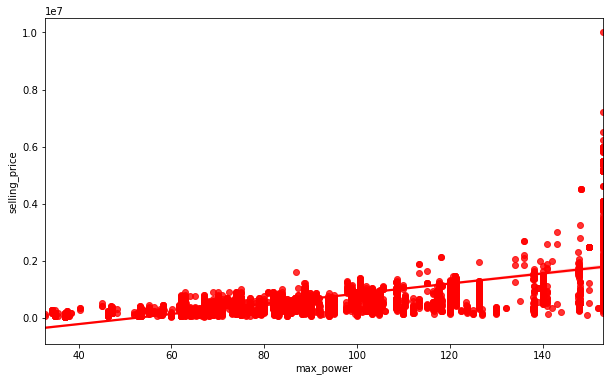

In [197]:
plt.figure(figsize=(10,6))
sns.regplot(x='max_power',y='selling_price',data=car1,marker='o',color='red')

In [198]:
car1

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Year_of_service
name,,,,,,,,,,
Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,7.0
Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,7.0
Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,15.0
Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,11.0
Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,14.0
...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,8.0
Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,14.0
Maruti Swift Dzire ZDi,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,12.0


In [199]:
#car1_df = pd.get_dummies(car1)

In [200]:
x = car1.drop("selling_price", axis=1)
y = car1['selling_price']

In [201]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state = 42)

In [202]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5534, 9), (2372, 9), (5534,), (2372,))

In [203]:
x_train[:5]

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Year_of_service
name,,,,,,,,,
Hyundai i20 Active 1.4 SX,108000,Diesel,Individual,Manual,First Owner,21.19,1396.0,88.73,6.0
Toyota Corolla Altis JS MT,50000,Petrol,Individual,Manual,First Owner,14.28,1798.0,138.03,6.0
Tata Manza Club Class Quadrajet90 LS,50000,Diesel,Individual,Manual,First Owner,21.02,1248.0,88.80,8.0
Tata Indigo CR4,100000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,8.0
Mahindra Bolero Power Plus ZLX,14000,Diesel,Individual,Manual,First Owner,16.50,1493.0,70.00,2.0


In [204]:
x_train_num = x_train.drop(['fuel','seller_type','transmission','owner'], axis=1)
x_train_cat = x_train[['fuel','seller_type','transmission','owner']]

In [205]:
scaler

StandardScaler()

In [206]:
x_train_num_scaled = scaler.fit_transform(x_train_num)

In [207]:
x_train_num_scaled[:5]

array([[ 0.94163161,  0.43801453, -0.05149412, -0.01792579, -0.25316512],
       [-0.40293296, -1.28982934,  0.91709791,  1.66395846, -0.25316512],
       [-0.40293296,  0.39550607, -0.40809019, -0.01553772,  0.28703761],
       [ 0.75617443,  1.03313297, -0.05149412, -0.65690534,  0.28703761],
       [-1.23749028, -0.73471886,  0.18222087, -0.65690534, -1.33357058]])

In [208]:
x_train_num.columns

Index(['km_driven', 'mileage', 'engine', 'max_power', 'Year_of_service'], dtype='object')

In [209]:
x_train_num_scaled_df = pd.DataFrame(x_train_num_scaled, columns=x_train_num.columns)

In [210]:
x_train_num_scaled_df[:5]

,km_driven,mileage,engine,max_power,Year_of_service
0,0.941632,0.438015,-0.051494,-0.017926,-0.253165
1,-0.402933,-1.289829,0.917098,1.663958,-0.253165
2,-0.402933,0.395506,-0.408090,-0.015538,0.287038
3,0.756174,1.033133,-0.051494,-0.656905,0.287038
4,-1.237490,-0.734719,0.182221,-0.656905,-1.333571


In [211]:
x_train_cat_dummy = pd.get_dummies(x_train_cat)

In [212]:
x_train_cat_dummy[:5]

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
name,,,,,,,,,,,,,,
Hyundai i20 Active 1.4 SX,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Toyota Corolla Altis JS MT,0,0,0,1,0,1,0,0,1,1,0,0,0,0
Tata Manza Club Class Quadrajet90 LS,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Tata Indigo CR4,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Mahindra Bolero Power Plus ZLX,0,1,0,0,0,1,0,0,1,1,0,0,0,0


In [213]:
x_train_num_scaled_df.index = x_train_cat_dummy.index

In [214]:
x_train_final = pd.concat([x_train_num_scaled_df, x_train_cat_dummy], axis=1)

In [215]:
x_train_final[:5]

,km_driven,mileage,engine,max_power,Year_of_service,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
name,,,,,,,,,,,,,,,,,,,
Hyundai i20 Active 1.4 SX,0.941632,0.438015,-0.051494,-0.017926,-0.253165,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Toyota Corolla Altis JS MT,-0.402933,-1.289829,0.917098,1.663958,-0.253165,0,0,0,1,0,1,0,0,1,1,0,0,0,0
Tata Manza Club Class Quadrajet90 LS,-0.402933,0.395506,-0.408090,-0.015538,0.287038,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Tata Indigo CR4,0.756174,1.033133,-0.051494,-0.656905,0.287038,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Mahindra Bolero Power Plus ZLX,-1.237490,-0.734719,0.182221,-0.656905,-1.333571,0,1,0,0,0,1,0,0,1,1,0,0,0,0


In [216]:
# Preprocessing on the test set

In [217]:
x_test[:5]

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Year_of_service
name,,,,,,,,,
Maruti Swift VDI,68000,Diesel,Dealer,Manual,First Owner,22.90,1248.0,74.0,7.0
Maruti Swift Dzire VDI,110000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.0,6.0
Tata Indica Vista TDI LX,185000,Diesel,Individual,Manual,Second Owner,19.40,1405.0,70.0,9.0
Toyota Corolla Altis Diesel D4DJ,90000,Diesel,Individual,Manual,Fourth & Above Owner,21.43,1364.0,87.2,9.0
Maruti Ignis 1.2 AMT Zeta BSIV,15000,Petrol,Individual,Automatic,First Owner,20.89,1197.0,81.8,3.0


In [218]:
x_test_num = x_test.drop(['fuel', 'seller_type', 'transmission', 'owner'], axis=1)

In [219]:
x_test_cat=x_test[['fuel','seller_type','transmission','owner']]

In [220]:
x_test_num[:5]

,km_driven,mileage,engine,max_power,Year_of_service
name,,,,,
Maruti Swift VDI,68000,22.90,1248.0,74.0,7.0
Maruti Swift Dzire VDI,110000,26.59,1248.0,74.0,6.0
Tata Indica Vista TDI LX,185000,19.40,1405.0,70.0,9.0
Toyota Corolla Altis Diesel D4DJ,90000,21.43,1364.0,87.2,9.0
Maruti Ignis 1.2 AMT Zeta BSIV,15000,20.89,1197.0,81.8,3.0


#### Preprocessing on numerical part of Test data

In [221]:
x_test_num_scaled = scaler.fit_transform(x_test_num)

In [222]:
x_test_num_scaled_df = pd.DataFrame(x_test_num_scaled, columns=x_test_num.columns)

In [223]:
x_test_num_scaled_df[:5]

,km_driven,mileage,engine,max_power,Year_of_service
0,0.004167,0.899697,-0.404337,-0.524992,-0.005140
1,0.980300,1.854910,-0.404337,-0.524992,-0.279141
2,2.723393,-0.006332,-0.015870,-0.663986,0.542862
3,0.515475,0.519165,-0.117317,-0.066310,0.542862
4,-1.227619,0.379377,-0.530527,-0.253952,-1.101144


#### Preprocessing on categorical part of Test data

In [224]:
x_test_cat_dummy = pd.get_dummies(x_test_cat)

In [225]:
x_test_cat_dummy[:5]

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
name,,,,,,,,,,,,,,
Maruti Swift VDI,0,1,0,0,1,0,0,0,1,1,0,0,0,0
Maruti Swift Dzire VDI,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Tata Indica Vista TDI LX,0,1,0,0,0,1,0,0,1,0,0,1,0,0
Toyota Corolla Altis Diesel D4DJ,0,1,0,0,0,1,0,0,1,0,1,0,0,0
Maruti Ignis 1.2 AMT Zeta BSIV,0,0,0,1,0,1,0,1,0,1,0,0,0,0


In [226]:
x_test_num_scaled_df.index = x_test_cat_dummy.index 

In [227]:
x_test_final = pd.concat([x_test_num_scaled_df, x_test_cat_dummy], axis=1)

In [229]:
x_test_final[:5]

,km_driven,mileage,engine,max_power,Year_of_service,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
name,,,,,,,,,,,,,,,,,,,
Maruti Swift VDI,0.004167,0.899697,-0.404337,-0.524992,-0.005140,0,1,0,0,1,0,0,0,1,1,0,0,0,0
Maruti Swift Dzire VDI,0.980300,1.854910,-0.404337,-0.524992,-0.279141,0,1,0,0,0,1,0,0,1,1,0,0,0,0
Tata Indica Vista TDI LX,2.723393,-0.006332,-0.015870,-0.663986,0.542862,0,1,0,0,0,1,0,0,1,0,0,1,0,0
Toyota Corolla Altis Diesel D4DJ,0.515475,0.519165,-0.117317,-0.066310,0.542862,0,1,0,0,0,1,0,0,1,0,1,0,0,0
Maruti Ignis 1.2 AMT Zeta BSIV,-1.227619,0.379377,-0.530527,-0.253952,-1.101144,0,0,0,1,0,1,0,1,0,1,0,0,0,0
